### Get insights from the data

##### Table of contents
   * [Loading necessary libraries](#loading-necessary-libraries)
   * [Fighters hometowns](#figters-hometowns)
   * [MMA gyms](#mma-gyms)
   * [Octagon debut](#octagon-debut)
   * [Fighters age](#figters-age)
   * [Fighters with the most significant strikes](#figters-with-the-most-significant-strikes)
   * [Takedowns](#takedowns)
   * [Way of winning](#way-of-winning)
   
  
 

#### Loading necessary libraries <a class="anchor" id="loading-necessary-libraries"></a>

In [1]:
# libraries to easily deal with data
import pandas as pd
import numpy as np

# libraries required for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# library required for Geolocation
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 

# set up the size and the font size of the charts
plt.rcParams['figure.figsize'] = [30, 15]
plt.rcParams['font.size'] = 22

In [2]:
df = pd.read_csv('prep_data.csv')
df.head(2)

,Athlete,Status,Hometown,Age,Height,Weight,Octagon Debut,Reach,Leg reach,Sig.str by target : HEAD,...,Average fight time,Sig. Strikes Landed,Sig. Strikes Attempted,Takedowns Landed,Takedowns Attempted,Wins by Decision,Trains at,First Round Finishes,Fighting style,Title Defenses
0,aalon-cruz,Active,"Parrish, United States",30,72.0,145.0,"Jul. 30, 2019",78.0,42.0,0,...,NaN,0,0,0,0,0,NaN,0,NaN,0
1,aaron-phillips,Active,"Houston, United States",30,69.0,135.0,"May. 24, 2014",70.0,41.0,28,...,15:00,56,94,0,1,0,NaN,0,NaN,0


#### Fighters hometowns <a class="anchor" id="figters-hometowns"></a>

In [3]:
df_hometown = pd.DataFrame() # empty dataframe to store hometowns, latitude and longitude
df_hometown['Hometown'] = df['Hometown'].dropna() # drop rows with missing values

In [4]:
longitude = [] # empty list to store latitude
latitude = []  # empty list to store longtude
   
# function to find the coordinate of a given city 
def hometownGeocode(hometown): 
         
    try: 
          
        # User_Agent is an http request header that is sent with each request
        # Nominatim asks that the user_agent also contains your email address    
        geolocator = Nominatim(user_agent="your_app_name") 
          
        return geolocator.geocode(hometown)                    
      
    except GeocoderTimedOut: 
          
        return findGeocode(hometown)     
  
    
for hometown in df_hometown: 
      
    if hometownGeocode(hometown) != None: 
           
        loc = hometownGeocode(hometown)  
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
        
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 
        
df_hometown['latitude'] = latitude
df_hometown['longitude'] = longitude

In [5]:
df_hometown.head()

,Hometown,longitude,latitude
0,"Parrish, United States",-87.284447,33.730664
1,"Houston, United States",-95.367697,29.758938
2,"Chechnya, Russia",45.698501,43.397615
3,"Accra, Ghana",-0.205744,5.560014
4,"Calvert County, United States",-76.537764,38.528853


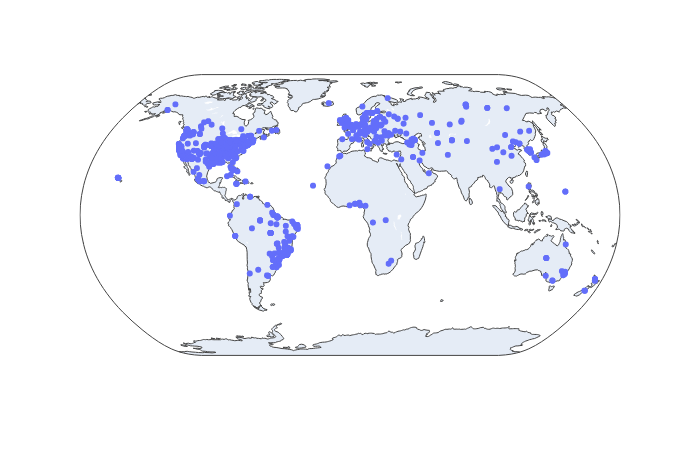

In [6]:
fig = px.scatter_geo(df_hometown,
                    lat='latitude',
                    lon='longitude',
                    hover_name='Hometown',
                    projection="natural earth")
fig.show('png') # fig.show('png') instead of fig.show() so plotly charts can be displayed when uploading notebook to my github page

you will notice that the most fighters are from USA, Brazil, EUROPE compared to other places like AFRICA and ASIA,... Here are some few reasons why :

-UFC is an AMERICAN mixed martial arts organization.

-Brazilian Jiu-Jitsu is one of the most effective individual martial art, this is why Brazil is a booming market for Mixed Martial Arts.

-The gap in infrastructure and knowledge about MMA.

#### MMA gyms <a class="anchor" id="mma-gyms"></a>

Having the best coaching, training camps,... is very important in MMA, so where ufc fighters train at?

In [7]:
trains_at_df = df.groupby(['Trains at']).size().reset_index(name='number of fighters').sort_values(by='number of fighters',ascending=False)
trains_at_df.head(10) # fighters training at the same gym

,Trains at,number of fighters
16,"American Top Team ATT Coconut Creek, FL",23
85,Jackson Wink MMA Academy - NM,18
171,Team Alpha Male (Urijah Faber's Ultimate Fitn...,8
3,AKA (American Kickboxing Academy) San Jose,7
26,"Blackzilians - Boca Raton, FL",7
197,Tristar Gym - Montreal,7
91,"Kings MMA - Huntington Beach, CA",6
211,"Xtreme Couture - Las Vegas, NV",5
10,Alliance MMA - Chula Vista,4
189,"Tiger Muay Thai - Phuket, Thailand",4


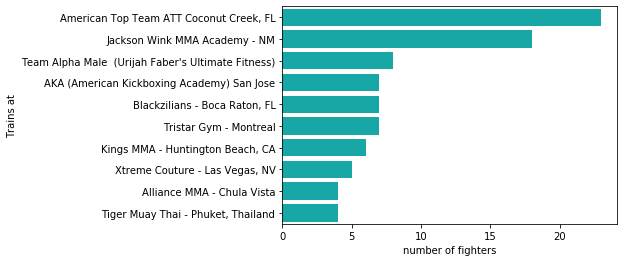

In [8]:
sns.barplot(x='number of fighters', y='Trains at', data=trains_at_df.head(10), color="c")

#### Octagon debut <a class="anchor" id="octagon-debut"></a>

In [9]:
df['Octagon Debut'] = pd.to_datetime(df['Octagon Debut']).dt.year

In [10]:
debut_df = df.groupby(['Octagon Debut']).size().reset_index(name='number of fighters')

In [11]:
debut_df.head()

,Octagon Debut,number of fighters
0,1998,1
1,1999,1
2,2000,2
3,2001,3
4,2002,2


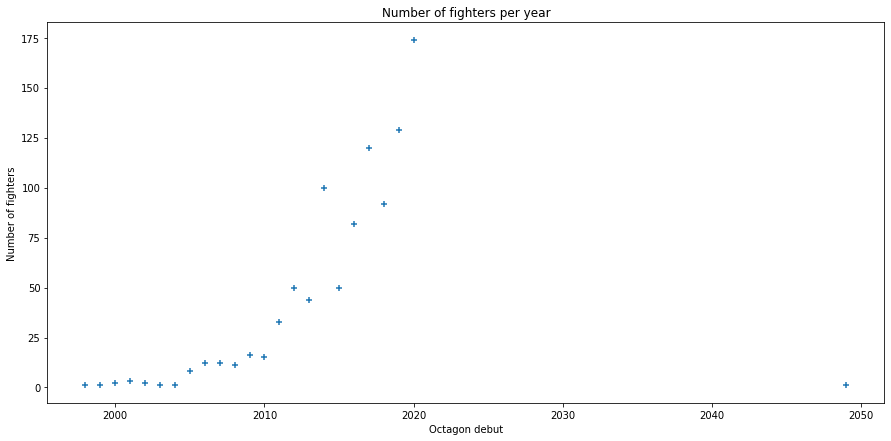

In [12]:
plt.figure(figsize=(15,7))
plt.ylabel('Number of fighters')
plt.xlabel('Octagon debut')
plt.title('Number of fighters per year')
plt.scatter(debut_df['Octagon Debut'], debut_df['number of fighters'], marker='+')

first of all, we can easily spot an outliers value in the right.\
between 2010 and 2020, UFC's signings incredibly increased ! which means that they started to make a good Revenue. 

#### Fighters age <a class="anchor" id="figters-age"></a>

In [13]:
ages_df = df[df['Status'] == 'Active'][['Athlete','Age']] # keep the active fighters only

The oldest fighter is :

In [14]:
ages_df[ages_df['Age'] == ages_df['Age'].max()]

,Athlete,Age
59,anderson-silva,45


The youngest fighters are :

In [15]:
ages_df[ages_df['Age'] == ages_df['Age'].min()]

,Athlete,Age
158,chanmi-jeon,21
165,chase-hooper,21
194,cory-mckenna,21
501,kay-hansen,21
630,maycee-barber,21
673,naoki-inoue,21


In [16]:
print('the average age of a fighter is : {}'.format(ages_df['Age'].mean()))

the average age of a fighter is : 30.712100139082057


In [17]:
print('the standard deviation : {}'.format(ages_df['Age'].std()))

the standard deviation : 4.182368604410846


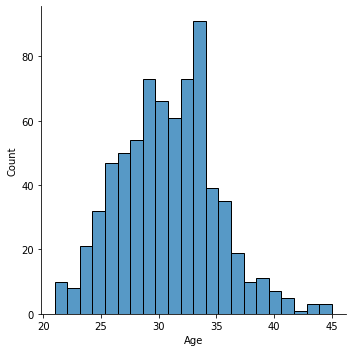

In [18]:
sns.displot(ages_df['Age'])

Let's create a new column of age_bins via defining bin edges : [20,25,30,35,40,45]

In [19]:
ages_df['age_bins'] = pd.cut(x=ages_df['Age'], bins=[20, 25, 30, 35,40,45])

In [20]:
ages_df.head()

,Athlete,Age,age_bins
0,aalon-cruz,30,"(25, 30]"
1,aaron-phillips,30,"(25, 30]"
3,abdul-razak-alhassan,35,"(30, 35]"
4,abu-azaitar,36,"(35, 40]"
5,adam-milstead,31,"(30, 35]"


In [21]:
df_bins = ages_df.groupby(['age_bins']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)
df_bins['percentage'] = df_bins['counts'].apply(lambda x: x / df_bins['counts'].sum() * 100).round(2)
df_bins

,age_bins,counts,percentage
1,"(25, 30]",290,40.33
2,"(30, 35]",264,36.72
3,"(35, 40]",82,11.40
0,"(20, 25]",71,9.87
4,"(40, 45]",12,1.67


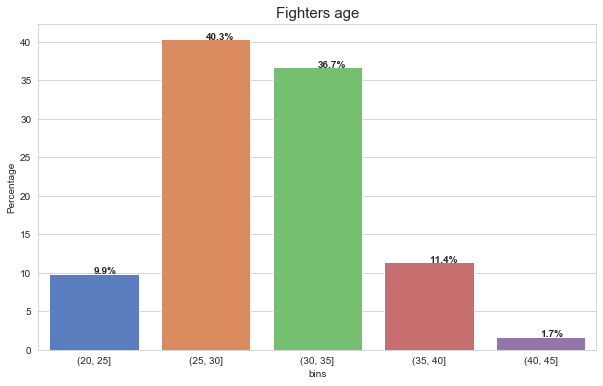

In [22]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='age_bins', y='percentage', data=df_bins, ci=None, palette="muted",orient='v', )
ax.set_title("Fighters age", fontsize=15)
ax.set_xlabel ("bins")
ax.set_ylabel ("Percentage")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )

The majority of fighters are between [25,35] years old (77%), it's the fighter's prime!

#### Fighters with the most significant strikes  <a class="anchor" id="figters-with-the-most-significant-strikes"></a>

Top10 fighters with the highest significant strikes :

In [23]:
df[['Athlete','Sig. Strikes Landed']].sort_values(by='Sig. Strikes Landed',ascending=False).head(10)

,Athlete,Sig. Strikes Landed
627,max-holloway,2071
261,donald-cerrone,1895
307,frankie-edgar,1568
676,nate-diaz,1482
443,jon-jones,1463
733,rafael-dos-anjos,1401
419,joanna-jedrzejczyk,1345
397,jeremy-stephens,1234
296,evan-dunham,1228
200,cub-swanson,1225


Top10 fighters with the highest significant strikes to the head :

In [24]:
df[['Athlete','Sig.str by target : HEAD']].sort_values(by='Sig.str by target : HEAD',ascending=False).head(10)

,Athlete,Sig.str by target : HEAD
627,max-holloway,1529
676,nate-diaz,1114
296,evan-dunham,1039
307,frankie-edgar,1030
261,donald-cerrone,966
277,dustin-poirier,894
762,robbie-lawler,833
733,rafael-dos-anjos,789
200,cub-swanson,758
682,neil-magny,741


Top10 fighters with the highest significant strikes to the body :

In [25]:
df[['Athlete','Sig.str by target : BODY']].sort_values(by='Sig.str by target : BODY',ascending=False).head(10)

,Athlete,Sig.str by target : BODY
261,donald-cerrone,458
627,max-holloway,429
480,junior-dos-santos,362
443,jon-jones,359
419,joanna-jedrzejczyk,340
733,rafael-dos-anjos,322
436,john-lineker,321
780,ross-pearson,314
307,frankie-edgar,296
636,michael-johnson,293


Top10 fighters with the highest significant strikes to the legs :

In [26]:
df[['Athlete','Sig.str by target : LEG']].sort_values(by='Sig.str by target : LEG',ascending=False).head(10)

,Athlete,Sig.str by target : LEG
261,donald-cerrone,471
443,jon-jones,417
860,thiago-alves,358
419,joanna-jedrzejczyk,358
733,rafael-dos-anjos,290
397,jeremy-stephens,289
283,edson-barboza,261
743,raphael-assuncao,258
307,frankie-edgar,242
200,cub-swanson,240


Top10 fighters in standing position :

In [27]:
df[['Athlete', 'Sig.str : Standing']].sort_values(by='Sig.str : Standing',ascending=False).head(10)

,Athlete,Sig.str : Standing
627,max-holloway,1733
261,donald-cerrone,1565
419,joanna-jedrzejczyk,1089
307,frankie-edgar,1056
296,evan-dunham,1024
676,nate-diaz,998
733,rafael-dos-anjos,958
25,alex-caceres,958
443,jon-jones,953
200,cub-swanson,953


w
When you are facing one of these guys, you should brobably avoid standing toe to toe with him. Maybe taking the fight to the ground is a good strategy to work on during the training camp.

Top10 clinch fighters  :

In [28]:
df[['Athlete', 'Sig.str : Clinch']].sort_values(by='Sig.str : Clinch',ascending=False).head(10)

,Athlete,Sig.str : Clinch
676,nate-diaz,353
443,jon-jones,248
733,rafael-dos-anjos,248
762,robbie-lawler,244
419,joanna-jedrzejczyk,240
442,johny-hendricks,236
402,jessica-andrade,234
614,matt-brown,224
68,angela-hill,219
277,dustin-poirier,212


If you are facing one of these guys, you must work on ways to escape the clinch during the training camp.


Top10 fighters who landed the highest number of significant strikes on the ground :

In [29]:
df[['Athlete', 'Sig.str : Ground']].sort_values(by='Sig.str : Ground',ascending=False).head(10)

,Athlete,Sig.str : Ground
307,frankie-edgar,384
520,khabib-nurmagomedov,368
253,diego-sanchez,332
326,glover-teixeira,293
239,demian-maia,279
682,neil-magny,274
518,kevin-lee,269
139,cain-velasquez,264
495,kamaru-usman,264
443,jon-jones,262


If you are facing one of these guys, you must work on your grappling skills, specially the takedown defense during the training camp. You also need to keep the fight as far as possible on the feet.


#### Takedowns <a class="anchor" id="takedowns"></a>

top10 fighters having the highest number of successful takedowns : 

In [30]:
df[['Athlete','Takedowns Landed']].sort_values(by='Takedowns Landed',ascending=False).head(10)

,Athlete,Takedowns Landed
307,frankie-edgar,67
182,clay-guida,63
442,johny-hendricks,61
239,demian-maia,60
688,nik-lentz,59
747,rashad-evans,53
192,corey-anderson,52
329,gray-maynard,50
520,khabib-nurmagomedov,49
187,colby-covington,48


#### Way of winning <a class="anchor" id="way-of-winning"></a>

In [31]:
wins_by_way_df = df[['Wins by Knockout', 'Wins by Submission', 'Wins by Decision']]

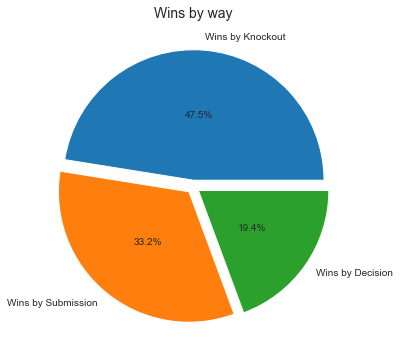

In [32]:
pie, ax = plt.subplots(figsize=[10,6])
labels = wins_by_way_df.keys()
plt.pie(x=wins_by_way_df.sum(), autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("Wins by way", fontsize=14);

The most wins are by KO/TKO, which means that MMA fighters have the higher risk of having CTE / Brain Damage.

This explains also the results in [Fighters age](#figters-age) section, 77% of ufc fighters are < 35 years old and that's because the chin of the fighter becomes weak after taking all that beating in his MMA career.